# Linear Regression
### Junfei Liu

In [77]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, accuracy_score


In [78]:
df= pd.read_csv('../forecasting_case_study.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1218 non-null   object 
 1   date                1218 non-null   object 
 2   Sales               1218 non-null   int64  
 3   Price Discount (%)  1218 non-null   object 
 4   In-Store Promo      1218 non-null   int64  
 5   Catalogue Promo     1218 non-null   int64  
 6   Store End Promo     1218 non-null   int64  
 7   Google_Mobility     1218 non-null   float64
 8   Covid_Flag          1218 non-null   int64  
 9   V_DAY               1218 non-null   int64  
 10  EASTER              1218 non-null   int64  
 11  CHRISTMAS           1218 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 114.3+ KB


## Preprocessing

In [79]:
df = df[df['Sales'] != 0]
df.reset_index(drop=True, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['date']=df['date'].map(dt.datetime.toordinal)
df['date']=df['date'] - df['date'].min() + 1

df['Price Discount (%)'] = df['Price Discount (%)'].str.replace('%', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1188 non-null   object 
 1   date                1188 non-null   int64  
 2   Sales               1188 non-null   int64  
 3   Price Discount (%)  1188 non-null   float64
 4   In-Store Promo      1188 non-null   int64  
 5   Catalogue Promo     1188 non-null   int64  
 6   Store End Promo     1188 non-null   int64  
 7   Google_Mobility     1188 non-null   float64
 8   Covid_Flag          1188 non-null   int64  
 9   V_DAY               1188 non-null   int64  
 10  EASTER              1188 non-null   int64  
 11  CHRISTMAS           1188 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 111.5+ KB


In [80]:
products = df['Product'].unique()

#create a data frame dictionary to store your data frames for different products
DataFrameDict = {elem : pd.DataFrame() for elem in products}

for key in DataFrameDict.keys():
    df_temp = df[:][df['Product'] == key]
    DataFrameDict[key] = df_temp.drop(['Product'], axis=1)
    
# print(DataFrameDict)

In [81]:
drop_enc = LabelBinarizer()
drop_enc.fit(df['Product'])
encoded = drop_enc.transform(df['Product'])
df.drop("Product", axis=1, inplace=True)
ohe_df = pd.DataFrame(encoded, columns=['SKU1','SKU2','SKU3','SKU4','SKU5','SKU6'])
df = pd.concat([df, ohe_df], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

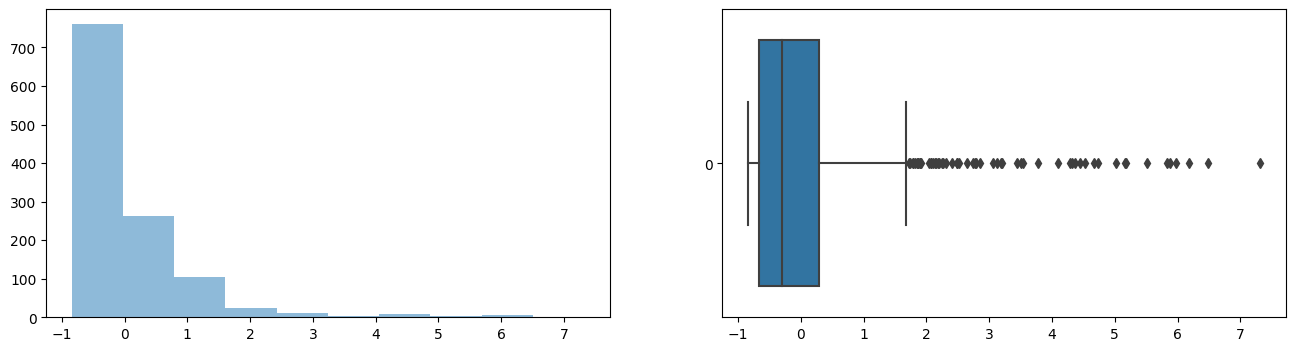

In [82]:
# normalize sales
y = df['Sales']
y_mean = y.mean()
y_std = y.std()
y_normalized = (y-y_mean)/y_std
plt.figure(figsize=(16,4))
#Histogram
plt.subplot(1,2,1)
plt.hist(y_normalized, alpha=0.5)
#boxplot
plt.subplot(1,2,2)
sns.boxplot(y_normalized, orient="h")
plt.show

C:\Users\23566\AppData\Local\Temp\ipykernel_23984\3189924765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_capping[y_capping > ninetieth_percentile] = ninetieth_percentile


<function matplotlib.pyplot.show(close=None, block=None)>

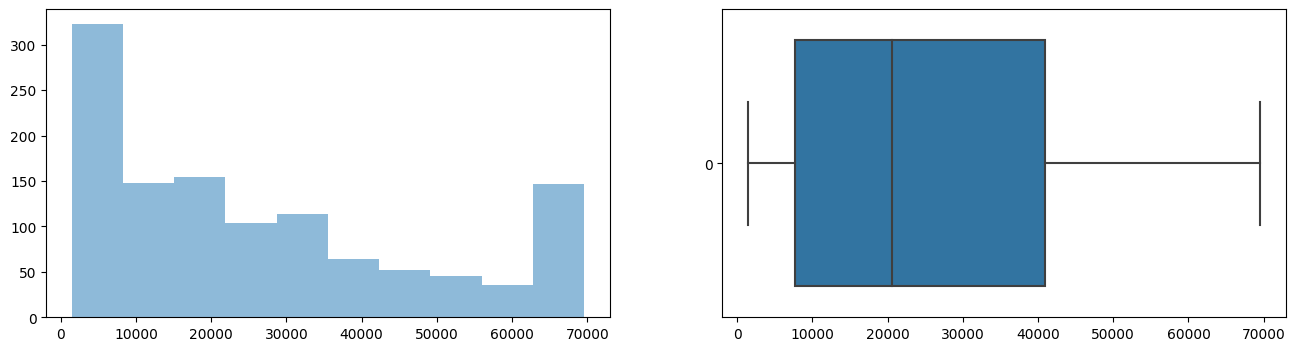

In [83]:
# 90% cap sales
ninetieth_percentile = np.percentile(y, 90)
y_capping = y
y_capping[y_capping > ninetieth_percentile] = ninetieth_percentile
plt.figure(figsize=(16,4))
#Histogram
plt.subplot(1,2,1)
plt.hist(y_capping, alpha=0.5)
#boxplot
plt.subplot(1,2,2)
sns.boxplot(y_capping, orient="h")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

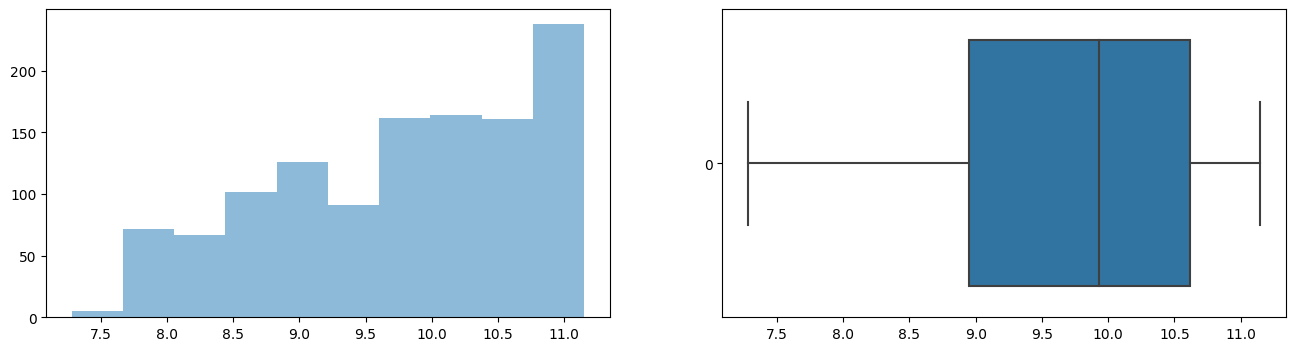

In [84]:
# log transform sales
y_log = [np.log(x) for x in df['Sales']]
plt.figure(figsize=(16,4))
#Histogram
plt.subplot(1,2,1)
plt.hist(y_log, alpha=0.5)
#boxplot
plt.subplot(1,2,2)
sns.boxplot(y_log, orient="h")
plt.show

## Linear Regression

In [85]:
X = df[['date', 'Price Discount (%)', 'In-Store Promo', 'Catalogue Promo', 'Store End Promo', 'Google_Mobility', 'Covid_Flag', 'V_DAY', 'EASTER', 'CHRISTMAS', 'SKU1','SKU2','SKU3','SKU4','SKU5','SKU6']]
df.info()
# print(df.iloc[pd.isnull(df).any(1).to_numpy().nonzero()])

model = linear_model.LinearRegression()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1188 non-null   int64  
 1   Sales               1188 non-null   float64
 2   Price Discount (%)  1188 non-null   float64
 3   In-Store Promo      1188 non-null   int64  
 4   Catalogue Promo     1188 non-null   int64  
 5   Store End Promo     1188 non-null   int64  
 6   Google_Mobility     1188 non-null   float64
 7   Covid_Flag          1188 non-null   int64  
 8   V_DAY               1188 non-null   int64  
 9   EASTER              1188 non-null   int64  
 10  CHRISTMAS           1188 non-null   int64  
 11  SKU1                1188 non-null   int32  
 12  SKU2                1188 non-null   int32  
 13  SKU3                1188 non-null   int32  
 14  SKU4                1188 non-null   int32  
 15  SKU5                1188 non-null   int32  
 16  SKU6  

In [86]:
# Sales with normalization
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test = (y_test-y_test.mean())/y_test.std()
print(f"The MAPE accuracy normalized sales is: {1 - mean_absolute_percentage_error(y_test, y_pred)}")

The MAPE accuracy normalized sales is: -0.613374447791676


In [87]:
# Sales with 90% capping
X_train, X_test, y_train, y_test = train_test_split(X, y_capping, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"The MAPE accuracy with 90% capped sales is: {1 - mean_absolute_percentage_error(y_test, y_pred)}")

The MAPE accuracy with 90% capped sales is: 0.34471663507292716


In [88]:
# Sales with log transform
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"The MAPE accuracy with log transformed sales is: {1 - mean_absolute_percentage_error(y_test, y_pred)}")

The MAPE accuracy with log transformed sales is: 0.9665007194158602


In [89]:
for product in products:
    df = DataFrameDict[product]
    X = df.drop(columns=['Sales'])
    y = df[['Sales']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"The MAPE accuracy of {product} is: {1 - mean_absolute_percentage_error(y_test, y_pred)}")

The MAPE accuracy of SKU1 is: 0.7948638818313927
The MAPE accuracy of SKU2 is: 0.21666453763436688
The MAPE accuracy of SKU3 is: 0.35308549929633093
The MAPE accuracy of SKU4 is: 0.3497013723710163
The MAPE accuracy of SKU5 is: 0.6524579006922739
The MAPE accuracy of SKU6 is: 0.17211287649047602
